In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dagstermill
from dagster import AssetKey
from ydata_profiling import ProfileReport

from orchestration.pipeline_nsw_doe import defs

In [35]:
context = dagstermill.get_context(op_config=3)

In [36]:
df_prep: pd.DataFrame = defs.load_asset_value(AssetKey(['analytics','metrics_by_year_school_saved_query'])) # type: ignore
df_prep

,metric_time__year,school__school_name,school__latest_year_enrolment_fte,school__level_of_schooling,school__icsea_value,school__indigenous_pct,school__selective_school,school__school_specialty_type,funding_aud_post_adjustments,funding_aud_original,funding_aud_post_adjustments_prev_year
0,2024-01-01,Albion Park Public School,490.0,Primary School,977.0,11.0,Not Selective,Comprehensive,NaN,685082.0,695548.0
1,2024-01-01,Arcadia Public School,71.0,Primary School,1058.0,np,Not Selective,Comprehensive,NaN,68533.0,75837.0
2,2024-01-01,Auburn North Public School,637.0,Primary School,1007.0,0.0,Not Selective,Comprehensive,NaN,1317605.0,1491270.0
3,2024-01-01,Barooga Public School,89.0,Primary School,972.0,np,Not Selective,Comprehensive,NaN,141741.0,182176.0
4,2024-01-01,Barrington Public School,53.0,Primary School,991.0,15.0,Not Selective,Comprehensive,NaN,82946.0,82935.0
...,...,...,...,...,...,...,...,...,...,...,...
15396,2025-01-01,Cronulla High School,1239.0,Secondary School,1048.0,3.0,Not Selective,Comprehensive,NaN,NaN,NaN
15397,2025-01-01,Boambee Public School,349.0,Primary School,1003.0,12.0,Not Selective,Comprehensive,NaN,NaN,NaN
15398,2025-01-01,Camden Public School,310.0,Primary School,1040.0,5.0,Not Selective,Comprehensive,NaN,NaN,NaN
15399,2025-01-01,Tallawong Public School,NaN,Primary School,NaN,None,Not Selective,Comprehensive,NaN,NaN,NaN


In [37]:
features = [
        "school__latest_year_enrolment_fte",
        "school__level_of_schooling",
        "school__icsea_value",
        "school__selective_school",
        "school__school_specialty_type",
    ]
target = "funding_aud_original"
all_columns = [*features, target]

In [38]:
df = df_prep[all_columns]
df.head()

,school__latest_year_enrolment_fte,school__level_of_schooling,school__icsea_value,school__selective_school,school__school_specialty_type,funding_aud_original
0,490.0,Primary School,977.0,Not Selective,Comprehensive,685082.0
1,71.0,Primary School,1058.0,Not Selective,Comprehensive,68533.0
2,637.0,Primary School,1007.0,Not Selective,Comprehensive,1317605.0
3,89.0,Primary School,972.0,Not Selective,Comprehensive,141741.0
4,53.0,Primary School,991.0,Not Selective,Comprehensive,82946.0


In [39]:
# oh dear some NANs!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15401 entries, 0 to 15400
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   school__latest_year_enrolment_fte  15115 non-null  float64
 1   school__level_of_schooling         15401 non-null  object 
 2   school__icsea_value                15048 non-null  float64
 3   school__selective_school           15401 non-null  object 
 4   school__school_specialty_type      15401 non-null  object 
 5   funding_aud_original               8793 non-null   float64
dtypes: float64(3), object(3)
memory usage: 722.0+ KB


In [40]:
df.dropna(inplace = True)

In [41]:
# reckless but better
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8593 entries, 0 to 15154
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   school__latest_year_enrolment_fte  8593 non-null   float64
 1   school__level_of_schooling         8593 non-null   object 
 2   school__icsea_value                8593 non-null   float64
 3   school__selective_school           8593 non-null   object 
 4   school__school_specialty_type      8593 non-null   object 
 5   funding_aud_original               8593 non-null   float64
dtypes: float64(3), object(3)
memory usage: 469.9+ KB


In [42]:
df.corr()

,school__latest_year_enrolment_fte,school__icsea_value,funding_aud_original
school__latest_year_enrolment_fte,1.000000,0.376639,0.640869
school__icsea_value,0.376639,1.000000,-0.214494
funding_aud_original,0.640869,-0.214494,1.000000


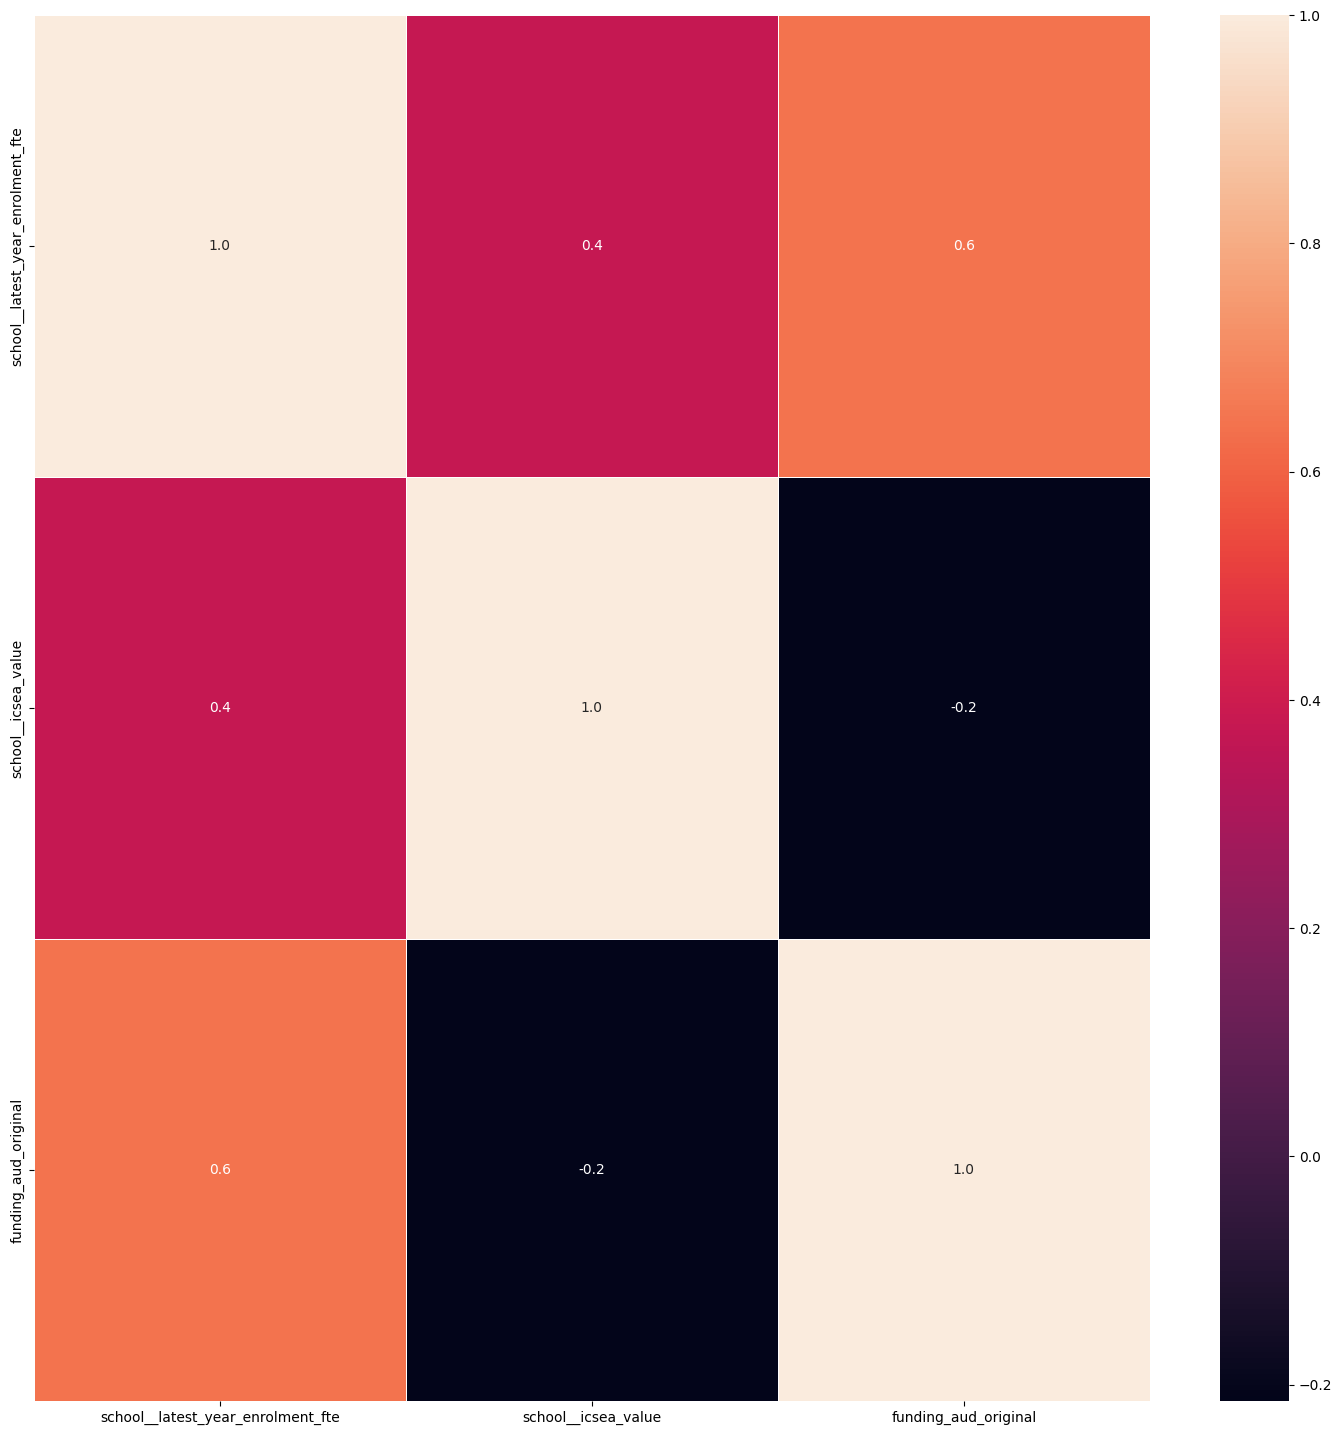

In [43]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [44]:
df.columns

Index(['school__latest_year_enrolment_fte', 'school__level_of_schooling',
       'school__icsea_value', 'school__selective_school',
       'school__school_specialty_type', 'funding_aud_original'],
      dtype='object')

In [45]:
df.head()

,school__latest_year_enrolment_fte,school__level_of_schooling,school__icsea_value,school__selective_school,school__school_specialty_type,funding_aud_original
0,490.0,Primary School,977.0,Not Selective,Comprehensive,685082.0
1,71.0,Primary School,1058.0,Not Selective,Comprehensive,68533.0
2,637.0,Primary School,1007.0,Not Selective,Comprehensive,1317605.0
3,89.0,Primary School,972.0,Not Selective,Comprehensive,141741.0
4,53.0,Primary School,991.0,Not Selective,Comprehensive,82946.0


In [46]:
df["school__icsea_value"]

0         977.0
1        1058.0
2        1007.0
3         972.0
4         991.0
          ...  
15150    1149.0
15151     962.0
15152    1065.0
15153    1084.0
15154    1061.0
Name: school__icsea_value, Length: 8593, dtype: float64

In [47]:
df[["school__icsea_value"]]

,school__icsea_value
0,977.0
1,1058.0
2,1007.0
3,972.0
4,991.0
...,...
15150,1149.0
15151,962.0
15152,1065.0
15153,1084.0


In [48]:
x = df["school__icsea_value"] > 1220
print(type(x))
df[x]

<class 'pandas.core.series.Series'>


,school__latest_year_enrolment_fte,school__level_of_schooling,school__icsea_value,school__selective_school,school__school_specialty_type,funding_aud_original
148,848.2,Secondary School,1226.0,Fully Selective,Agricultural,384536.0
3028,848.2,Secondary School,1226.0,Fully Selective,Agricultural,363948.0
5446,848.2,Secondary School,1226.0,Fully Selective,Agricultural,357952.0
10160,848.2,Secondary School,1226.0,Fully Selective,Agricultural,451537.0


In [49]:
df.tail()

,school__latest_year_enrolment_fte,school__level_of_schooling,school__icsea_value,school__selective_school,school__school_specialty_type,funding_aud_original
15150,526.0,Primary School,1149.0,Not Selective,Comprehensive,391151.0
15151,78.0,Primary School,962.0,Not Selective,Comprehensive,129489.0
15152,279.0,Primary School,1065.0,Not Selective,Comprehensive,249548.0
15153,28.0,Primary School,1084.0,Not Selective,Comprehensive,36932.0
15154,340.0,Primary School,1061.0,Not Selective,Comprehensive,286529.0


In [50]:
df.shape

(8593, 6)

In [51]:
df.describe()

,school__latest_year_enrolment_fte,school__icsea_value,funding_aud_original
count,8593.000000,8593.000000,8.593000e+03
mean,362.715070,980.269289,6.058228e+05
std,322.438222,94.612973,5.669323e+05
min,4.000000,568.000000,1.010400e+04
25%,102.000000,924.000000,1.859840e+05
50%,286.000000,975.000000,4.334990e+05
75%,525.000000,1045.000000,8.306690e+05
max,2173.000000,1226.000000,3.346973e+06


<Axes: title={'center': 'funding_aud_original'}, xlabel='school__level_of_schooling'>

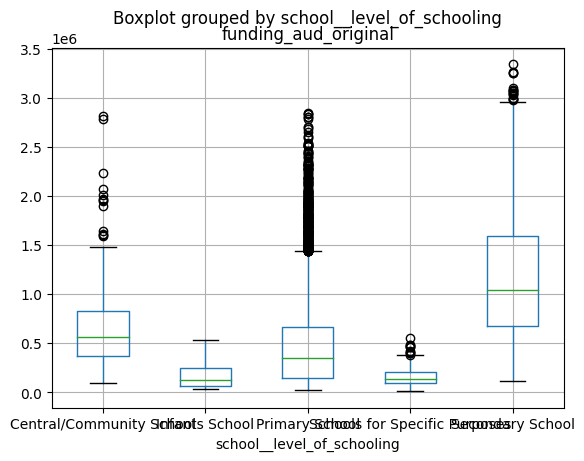

In [52]:
df.boxplot(column='funding_aud_original',by = 'school__level_of_schooling')

In [54]:

profile = ProfileReport(df, title="Profiling Report")

In [55]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='school__latest_year_enrolment_fte', ylabel='funding_aud_original'>

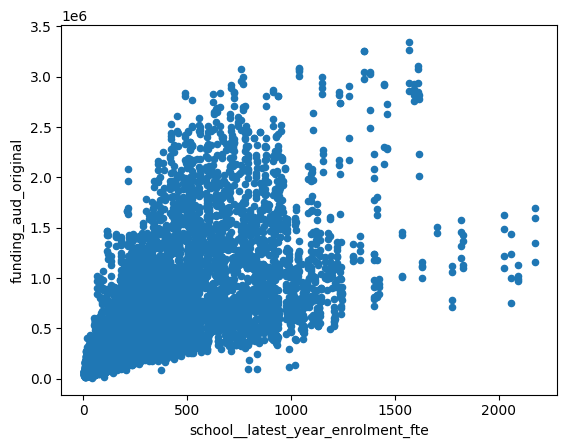

In [60]:
# from the correlation above funding is partially correlated to enrolments
df.plot(kind='scatter',y='funding_aud_original',x='school__latest_year_enrolment_fte')